## Análisis del Problema
Se desea predecir el precio de las casas en el área de Boston Mass a partir de las 
características presentadas más adelante en este enunciado. Recuerde que se quiere 
predecir utilizando la mayor cantidad de variables. Por favor entregue el mejor modelo de 
predicción con las características presentadas. Este conjunto de datos contiene información 
recopilada por el Servicio de Censos de los EE.

![Autos ROC](http://s04.s3c.es/imag/_v0/770x420/0/a/0/casa-monedas-getty.jpg)

## Entendimiento de los Datos

-  CRIM: - tasa de delincuencia per cápita por ciudad 
- ZN: - proporción de tierra residencial zonificada para lotes de más de 25,000 pies cuadrados. 
- INDUS: - proporción de acres de negocios no minoristas por ciudad. 
- CHAS: - Variable ficticia del río Charles (1 si el trecho delimita al río; 
- NOX: - concentración de óxidos nítricos (partes por 10 millones) 
- RM: - número promedio de habitaciones por vivienda 
- EDAD: - proporción de unidades ocupadas por el propietario construidas antes de 1940 
- DIS: - distancias ponderadas a cinco centros de empleo de Boston 
- RAD: - índice de accesibilidad a autopistas radiales 
- IMPUESTO: - tasa de impuesto a la propiedad de valor total por  10,000 dolares 
- PTRATIO: - Proporción alumnos por profesor por ciudad. 
- BLACK: - porcentaje de negros por ciudad 
- LSTAT: porcentaje de población pobre 
- MEDV: valor medio de las viviendas ocupadas por sus propietarios en  1000 dolares

## Exploración de los Datos

In [4]:
library(caTools)
library(ggplot2)
#Evitar mostrar warning messages
options(warn=-1)
casas <- read.csv('data_nueva.csv', header = T, na.strings = '?')
print(casas)

    crim  zn indus chas nox rm age dis rad tax ptratio black lstat medv
1      0  18     2    0   1  7  65   4   1 296      15   397     5   24
2      0   0     7    0   0  6  79   5   2 242      18   397     9   22
3      0   0     7    0   0  7  61   5   2 242      18   393     4   35
4      0   0     2    0   0  7  46   6   3 222      19   395     3   33
5      0   0     2    0   0  7  54   6   3 222      19   397     5   36
6      0   0     2    0   0  6  59   6   3 222      19   394     5   29
7      0  13     8    0   1  6  67   6   5 311      15   396    12   23
8      0  13     8    0   1  6  96   6   5 311      15   397    19   27
9      0  13     8    0   1  6 100   6   5 311      15   387    30   17
10     0  13     8    0   1  6  86   7   5 311      15   387    17   19
11     0  13     8    0   1  6  94   6   5 311      15   393    20   15
12     0  13     8    0   1  6  83   6   5 311      15   397    13   19
13     0  13     8    0   1  6  39   5   5 311      15   391    

In [5]:
colnames(casas) <- c('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'EDAD', 
                     'DIS', 'RAD','IMPUESTO','PTRATIO','BLACK','LSTAT','MEDV')

In [6]:
casas<-casas[,1:14]

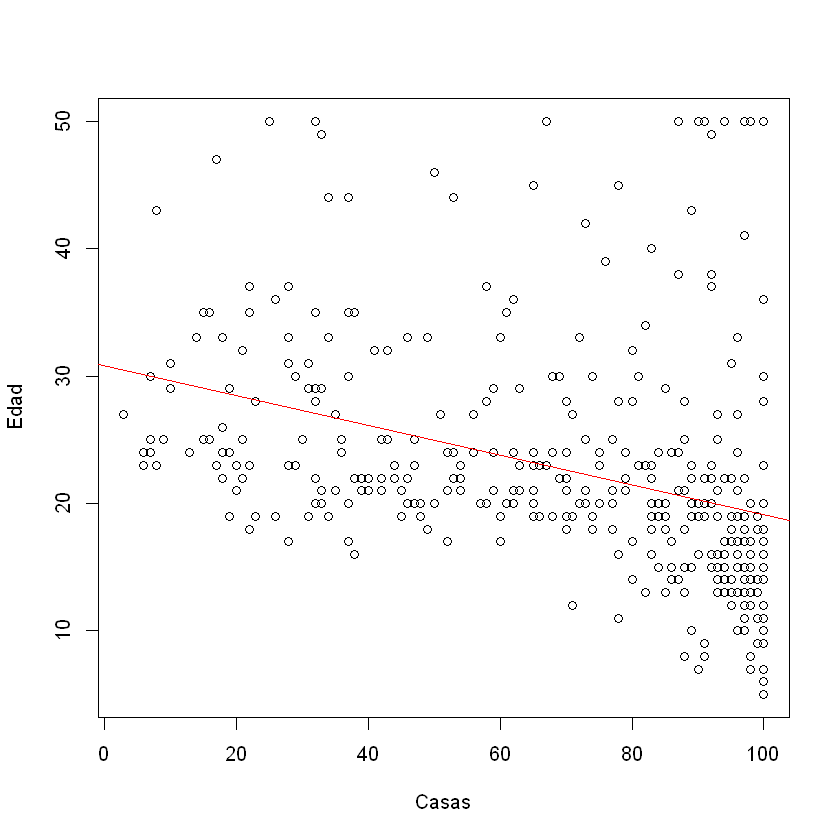


Call:
lm(formula = EDAD ~ MEDV, data = casas)

Residuals:
   Min     1Q Median     3Q    Max 
-62.13 -21.47   7.57  18.90  62.87 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  94.5466     3.0785  30.712   <2e-16 ***
MEDV         -1.1484     0.1263  -9.094   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 26.11 on 504 degrees of freedom
Multiple R-squared:  0.141,	Adjusted R-squared:  0.1393 
F-statistic:  82.7 on 1 and 504 DF,  p-value: < 2.2e-16


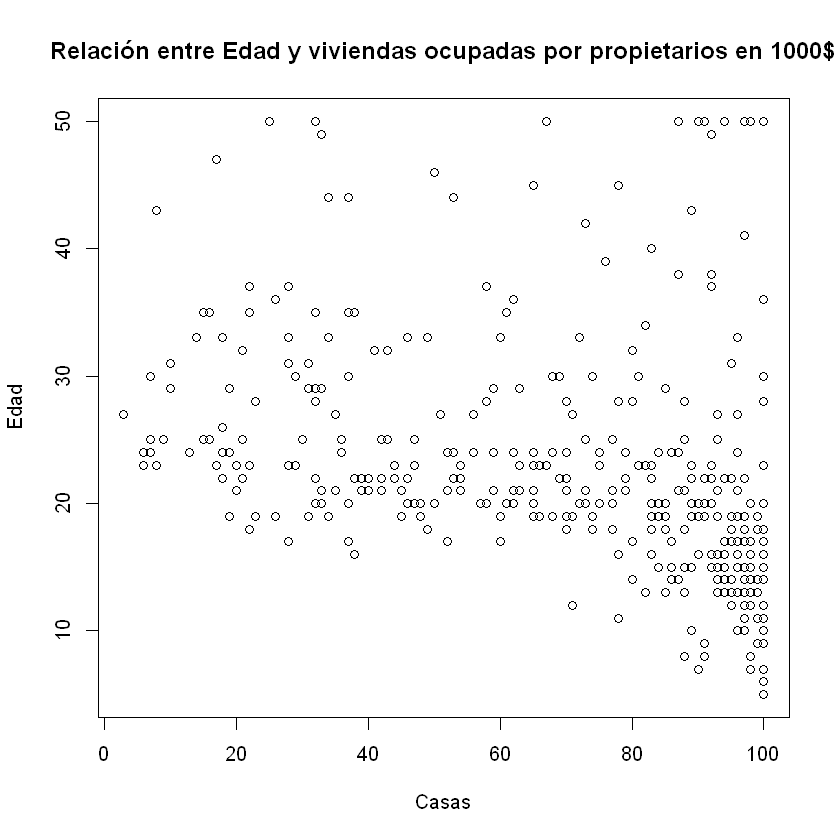

In [7]:
set.seed(1376)
splt <- sample.split(casas$EDAD , SplitRatio = 0.8)
casas.entrenamiento <- casas[splt, ]
casas.prueba <- casas[!splt, ]

erer.EDAD <- lm(EDAD ~MEDV, data =casas)

y<-casas.entrenamiento$MEDV
x<-casas.entrenamiento$EDAD
fit<-lm(y ~ x)
plot(x,y,ylab = 'Edad', xlab = 'Casas')
abline(fit,col="red")


plot(x = casas.entrenamiento$EDAD, y = casas.entrenamiento$MEDV, main = 'Relación entre Edad y viviendas ocupadas por propietarios en 1000$', ylab = 'Edad', xlab = 'Casas')
erer.IMPUESTO <- lm(EDAD ~ MEDV, data = casas)
summary(erer.EDAD)

In [8]:
print(".................................Entrenamiento..................................")
summary(casas.entrenamiento)
print(".................................Pruebas........................................")
summary(casas.prueba)

[1] ".................................Entrenamiento.................................."


      CRIM              ZN             INDUS            CHAS        
 Min.   : 0.000   Min.   :  0.00   Min.   : 0.00   Min.   :0.00000  
 1st Qu.: 0.000   1st Qu.:  0.00   1st Qu.: 5.00   1st Qu.:0.00000  
 Median : 0.000   Median :  0.00   Median :10.00   Median :0.00000  
 Mean   : 3.254   Mean   : 11.62   Mean   :11.07   Mean   :0.06716  
 3rd Qu.: 4.000   3rd Qu.: 13.00   3rd Qu.:18.00   3rd Qu.:0.00000  
 Max.   :74.000   Max.   :100.00   Max.   :28.00   Max.   :1.00000  
      NOX               RM             EDAD             DIS        
 Min.   :0.0000   Min.   :4.000   Min.   :  3.00   Min.   : 1.000  
 1st Qu.:0.0000   1st Qu.:6.000   1st Qu.: 44.25   1st Qu.: 2.000  
 Median :1.0000   Median :6.000   Median : 78.00   Median : 3.000  
 Mean   :0.6194   Mean   :6.271   Mean   : 68.58   Mean   : 3.826  
 3rd Qu.:1.0000   3rd Qu.:7.000   3rd Qu.: 94.00   3rd Qu.: 5.000  
 Max.   :1.0000   Max.   :9.000   Max.   :100.00   Max.   :11.000  
      RAD            IMPUESTO        PTRA

[1] ".................................Pruebas........................................"


      CRIM             ZN            INDUS            CHAS        
 Min.   : 0.00   Min.   : 0.00   Min.   : 2.00   Min.   :0.00000  
 1st Qu.: 0.00   1st Qu.: 0.00   1st Qu.: 5.00   1st Qu.:0.00000  
 Median : 0.00   Median : 0.00   Median : 9.00   Median :0.00000  
 Mean   : 4.76   Mean   :10.46   Mean   :11.38   Mean   :0.07692  
 3rd Qu.: 4.25   3rd Qu.: 3.25   3rd Qu.:18.00   3rd Qu.:0.00000  
 Max.   :89.00   Max.   :90.00   Max.   :26.00   Max.   :1.00000  
      NOX              RM            EDAD             DIS        
 Min.   :0.000   Min.   :5.00   Min.   :  7.00   Min.   : 1.000  
 1st Qu.:0.000   1st Qu.:6.00   1st Qu.: 45.75   1st Qu.: 2.000  
 Median :1.000   Median :6.00   Median : 77.00   Median : 3.000  
 Mean   :0.625   Mean   :6.25   Mean   : 68.75   Mean   : 3.567  
 3rd Qu.:1.000   3rd Qu.:7.00   3rd Qu.: 94.00   3rd Qu.: 5.000  
 Max.   :1.000   Max.   :9.00   Max.   :100.00   Max.   :12.000  
      RAD            IMPUESTO        PTRATIO         BLACK           

In [9]:
print("Eliminar datos fuera de rango")
casas.prueba <- casas.prueba[casas.prueba$EDAD>=6 & casas.prueba$MEDV>=30, ]
print(".................................Entrenamiento..................................")
summary(casas.entrenamiento)
print(".................................Pruebas........................................")
summary(casas.prueba)

[1] "Eliminar datos fuera de rango"
[1] ".................................Entrenamiento.................................."


      CRIM              ZN             INDUS            CHAS        
 Min.   : 0.000   Min.   :  0.00   Min.   : 0.00   Min.   :0.00000  
 1st Qu.: 0.000   1st Qu.:  0.00   1st Qu.: 5.00   1st Qu.:0.00000  
 Median : 0.000   Median :  0.00   Median :10.00   Median :0.00000  
 Mean   : 3.254   Mean   : 11.62   Mean   :11.07   Mean   :0.06716  
 3rd Qu.: 4.000   3rd Qu.: 13.00   3rd Qu.:18.00   3rd Qu.:0.00000  
 Max.   :74.000   Max.   :100.00   Max.   :28.00   Max.   :1.00000  
      NOX               RM             EDAD             DIS        
 Min.   :0.0000   Min.   :4.000   Min.   :  3.00   Min.   : 1.000  
 1st Qu.:0.0000   1st Qu.:6.000   1st Qu.: 44.25   1st Qu.: 2.000  
 Median :1.0000   Median :6.000   Median : 78.00   Median : 3.000  
 Mean   :0.6194   Mean   :6.271   Mean   : 68.58   Mean   : 3.826  
 3rd Qu.:1.0000   3rd Qu.:7.000   3rd Qu.: 94.00   3rd Qu.: 5.000  
 Max.   :1.0000   Max.   :9.000   Max.   :100.00   Max.   :11.000  
      RAD            IMPUESTO        PTRA

[1] ".................................Pruebas........................................"


      CRIM              ZN            INDUS           CHAS      
 Min.   :0.0000   Min.   : 0.00   Min.   : 2.0   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.: 0.00   1st Qu.: 2.0   1st Qu.:0.000  
 Median :0.0000   Median :10.00   Median : 3.5   Median :0.000  
 Mean   :0.3125   Mean   :25.38   Mean   : 5.0   Mean   :0.125  
 3rd Qu.:0.2500   3rd Qu.:41.25   3rd Qu.: 6.0   3rd Qu.:0.000  
 Max.   :2.0000   Max.   :90.00   Max.   :20.0   Max.   :1.000  
      NOX              RM             EDAD            DIS        
 Min.   :0.000   Min.   :7.000   Min.   :16.00   Min.   : 2.000  
 1st Qu.:0.000   1st Qu.:7.000   1st Qu.:38.25   1st Qu.: 3.000  
 Median :0.000   Median :7.000   Median :54.00   Median : 4.000  
 Mean   :0.375   Mean   :7.438   Mean   :55.81   Mean   : 4.438  
 3rd Qu.:1.000   3rd Qu.:8.000   3rd Qu.:73.25   3rd Qu.: 5.000  
 Max.   :1.000   Max.   :9.000   Max.   :96.00   Max.   :12.000  
      RAD           IMPUESTO        PTRATIO          BLACK      
 Min.   :2.000   M

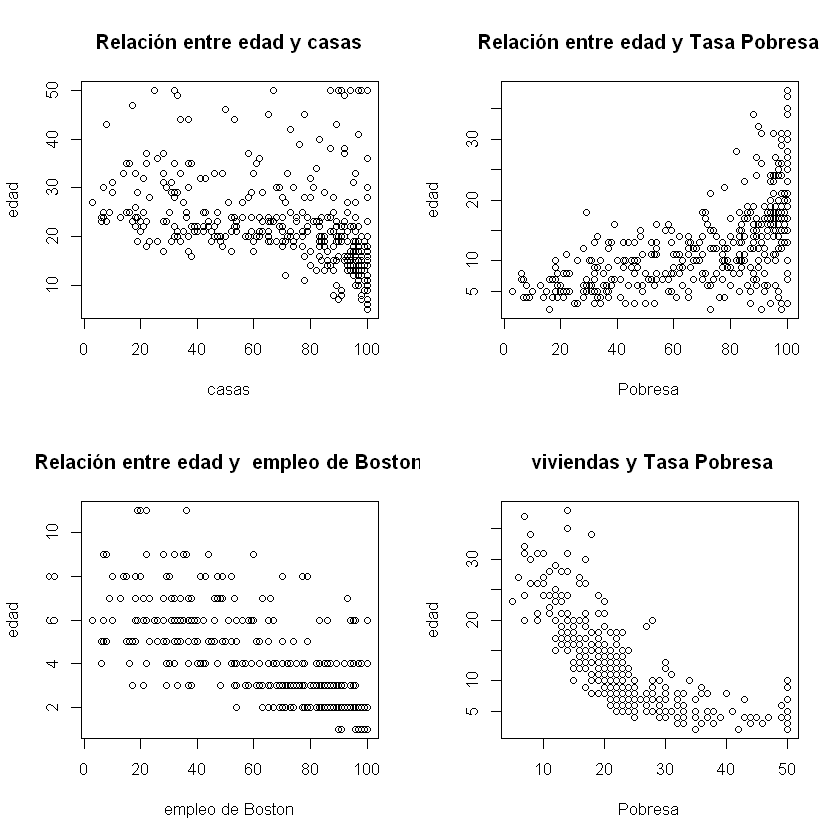

In [12]:
par(mfrow = c(2,2)) #crear una cuadrícula de 2 columnas y 2 hileras para ver cuatro gráficos.

plot(x = casas.entrenamiento$EDAD, y = casas.entrenamiento$MEDV, main = 'Relación entre edad y casas', ylab = 'edad', xlab = 'casas')
plot(x = casas.entrenamiento$EDAD , y = casas.entrenamiento$LSTAT  , main = 'Relación entre edad y Tasa Pobresa', ylab = 'edad', xlab = 'Pobresa')
plot(x = casas.entrenamiento$EDAD , y = casas.entrenamiento$DIS  , main = 'Relación entre edad y  empleo de Boston', ylab = 'edad', xlab = 'empleo de Boston')
plot(x = casas.entrenamiento$MEDV , y = casas.entrenamiento$LSTAT  , main = ' viviendas y Tasa Pobresa', ylab = 'edad', xlab = 'Pobresa')

In [2]:
par(mfrow = c(1,1)) #volver a solo un gráfico por visualización.

pairs(casas.entrenamiento[!is.na(casas$CRIM), c(1,2,3,4,5,6,7,8,9,10,11,12,13,14)], main = 'Relación entre predictores')

ERROR: Error in pairs(casas.entrenamiento[!is.na(casas$CRIM), c(1, 2, 3, 4, 5, : objeto 'casas.entrenamiento' no encontrado


In [70]:
cor(casas.entrenamiento[!is.na(casas.entrenamiento$NOX),c(1,3,4,5,6)])

,CRIM,INDUS,CHAS,NOX,RM
CRIM,1.0000000,0.40948560,-0.042533599,0.332286072,-0.25041241
INDUS,0.4094856,1.00000000,0.093784637,0.633806486,-0.40653954
CHAS,-0.0425336,0.09378464,1.000000000,0.005651713,0.09067034
NOX,0.3322861,0.63380649,0.005651713,1.000000000,-0.22755266
RM,-0.2504124,-0.40653954,0.090670344,-0.227552658,1.00000000


## Modelo de Minería de Datos

In [74]:
reg.MEDV <- lm(MEDV ~ RM +DIS+PTRATIO+LSTAT+NOX, data = casas.entrenamiento)

summary(reg.MEDV)


Call:
lm(formula = MEDV ~ RM + DIS + PTRATIO + LSTAT + NOX, data = casas.entrenamiento)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9121  -3.0194  -0.6344   1.9119  25.9954 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.11567    4.52152   7.103 5.71e-12 ***
RM           3.45196    0.45136   7.648 1.57e-13 ***
DIS         -0.97770    0.18050  -5.417 1.06e-07 ***
PTRATIO     -0.92592    0.13544  -6.836 3.08e-11 ***
LSTAT       -0.70586    0.05232 -13.490  < 2e-16 ***
NOX         -2.26824    0.79740  -2.845  0.00468 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.184 on 396 degrees of freedom
Multiple R-squared:  0.686,	Adjusted R-squared:  0.682 
F-statistic:   173 on 5 and 396 DF,  p-value: < 2.2e-16


In [75]:
casas.prueba$Prediccion <- predict(reg.MEDV, newdata = casas.prueba)

## Evaluación

In [77]:
sqrt(mean((casas.prueba$MEDV- casas.prueba$Prediccion)^2,na.rm=TRUE))

[1] 6.644184

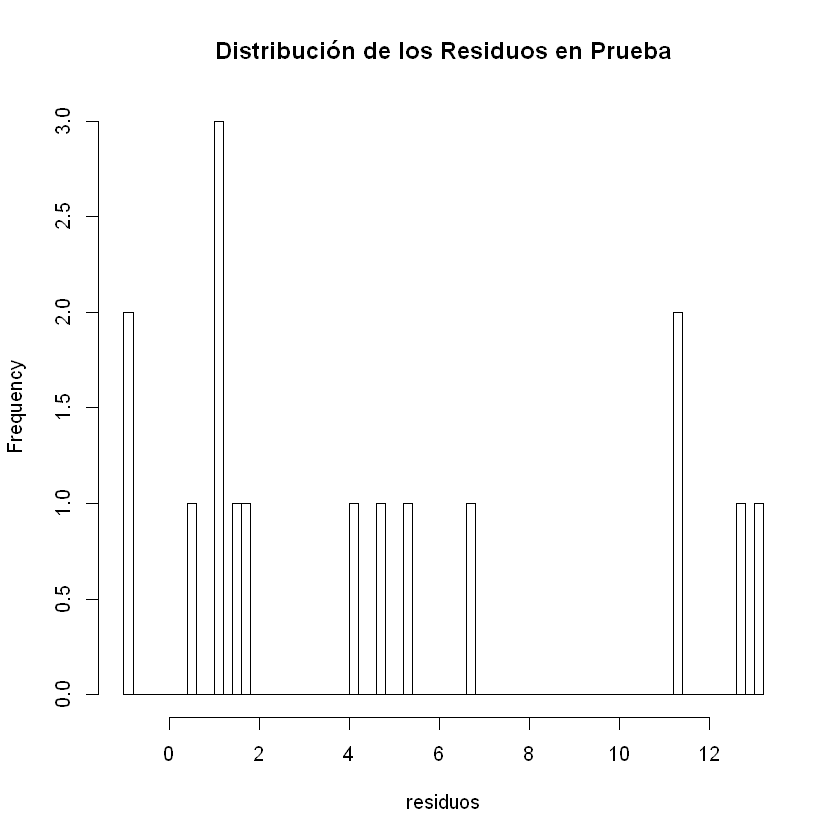

In [78]:
hist(casas.prueba$MEDV - casas.prueba$Prediccion, 
     breaks = 50,
     main = 'Distribución de los Residuos en Prueba',
     xlab = 'residuos')

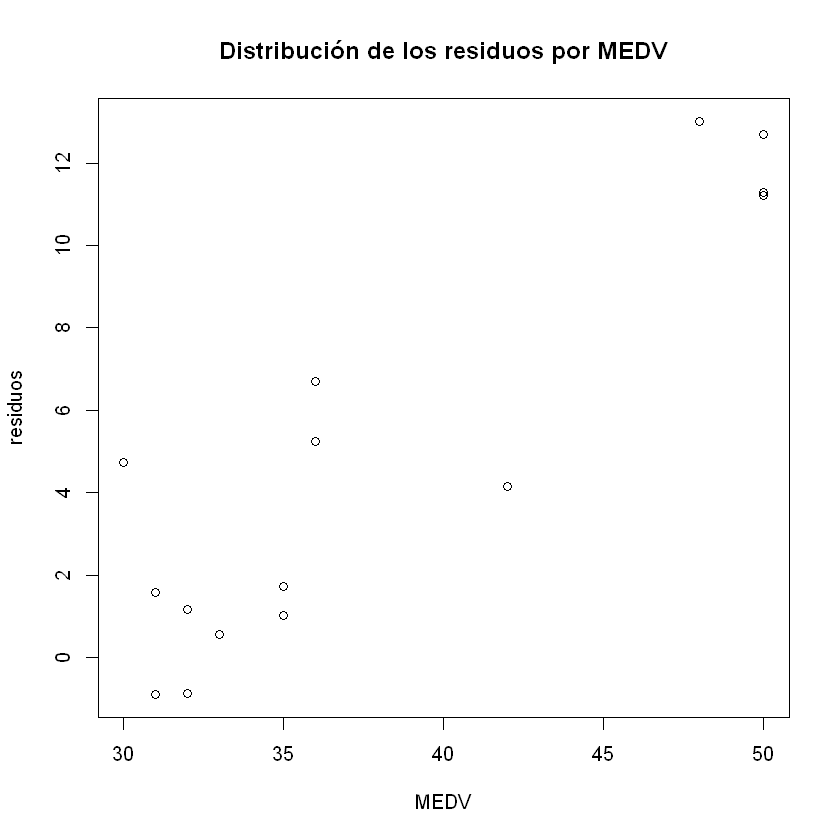

In [80]:
plot(y = casas.prueba$MEDV - casas.prueba$Prediccion,
     x = casas.prueba$MEDV,
     main = 'Distribución de los residuos por MEDV',
     xlab = 'MEDV',
     ylab = 'residuos')

In [83]:
reg.MEDV <- lm (MEDV ~ BLACK+EDAD , data = casas.entrenamiento)

summary(reg.MEDV)


Call:
lm(formula = MEDV ~ BLACK + EDAD, data = casas.entrenamiento)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.493  -5.033  -2.261   2.015  29.965 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.681422   2.313757   8.938  < 2e-16 ***
BLACK        0.024109   0.004848   4.973 9.80e-07 ***
EDAD        -0.094705   0.015391  -6.153 1.85e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.339 on 399 degrees of freedom
Multiple R-squared:  0.1813,	Adjusted R-squared:  0.1772 
F-statistic: 44.19 on 2 and 399 DF,  p-value: < 2.2e-16
